<h1 style='text-align:center'>NoSQL - Not Only SQL</h1>

#### What's wrong with SQL? 

- SQL offers a ton of structure for storing data 
    - That structure requires data to come in, in a certain way (aka your data must have structure) 
    - Structure comes at the cost of speed 
    
    
- SQL structure is very rigid - if you want to change the schema it requires you to change all of your existing data to match the new schema 


- Large data requires distributed computing (many computers working together to accomplish the same task) - Executing distributed joins is a very complex problem in relational databases. 

#### What does NoSQL offer? 

- Schemaless − Number of fields, content and size of the data object can differ from one data object to another.
- You can store virtually any kind of data. 
- Structure of a single object is clear.
- No complex joins.
- To scale up and handle more queries, just add more machines
- You can change the schema of your database on the fly

#### Types of NoSQL Databases

<img style='width: 400px' src='images/nosql-types.png/'>

<b>Document databases</b> pair each key with a complex data structure known as a document. Documents can contain many different key-value pairs, or key-array pairs, or even nested documents.

<img  style='align: center; width:150px' src='images/mongodb.png' />
<img style='align: center;' src='images/couchdb.png' />
<img style='align: center; width: 200px' src='images/documentdb.png' />

<b>Graph stores</b> are used to store information about networks of data, such as social connections. Graph stores include Neo4J and Giraph.

<img  style='align: center; width:150px' src='images/ApacheGiraph.svg' />
<img style='align: center;' src='images/neo4j.png' />

<b>Key-value</b> stores are the simplest NoSQL databases. Every single item in the database is stored as an attribute name (or 'key'), together with its value. Examples of key-value stores are Riak and Berkeley DB. 

<b>Wide-column stores</b> such as Cassandra and HBase are optimized for queries over large datasets, and store columns of data together, instead of rows.

## What is MongoDB

MongoDB stores data in flexible, JSON-like documents, meaning fields can vary from document to document and data structure can be changed over time

<b>Data Structure</b>

Single Entry = Document

```json
{ 
  _id: ObjectId(8af37bd7891c), 
  title: 'MongoDB Lab',
  description: 'Introductory lab on how to use MongoDB',
  by: 'Flatiron School',
  topics: ['mongodb', 'database', 'NoSQL', 'JSON']  
}
```

You can embed documents inside documents! 

<img src ='images/househouse.gif' />

```json
{ 
  _id: ObjectId(8af37bd78ssc), 
  title: 'Other Lab',
  description: 'Introductory lab on how to use something',
  by: 'Flatiron School',
  topics: ['blah', 'blah', 'blah', 'blah'],
  author: {
            name: 'Andy Enkeboll',
            building: 'Metropolitan Square'
          }
}
```

##### Why would we want to nest objects? 

Multiple Documents = Collection

```json
{ 
  _id: ObjectId(8af37bd7891c), 
  title: 'MongoDB Lab',
  description: 'Introductory lab on how to use MongoDB',
  by: 'Flatiron School',
  topics: ['mongodb', 'database', 'NoSQL', 'JSON']  
}, 
{ 
  _id: ObjectId(8af37bd78ssc), 
  title: 'Other Lab',
  description: 'Introductory lab on how to use something',
  by: 'Flatiron School',
  topics: ['blah', 'blah', 'blah', 'blah']  
}
```

#### Working with MongoDB

Assuming you have installed/setup mongo and pip installed pymongo...

In [1]:
import pymongo

In [2]:
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

# grab a database from your server 
db = myclient['example_data']

# this can be a new one or an existing one
# (if it doesn't exist, it will get create when you write data into it)

In [3]:
myclient.list_database_names()

['admin', 'amazon', 'config', 'demo_1118', 'example_data', 'local']

In [4]:
# initialize an empty collection - this where your 'documents' will go
coll = db['example_collection']

In [11]:
example_data = {'name': 'John Doe', 'address': '123 elm street',
                'age': 28, 'children': ['Jane', 'Joe']}
coll.insert_one(example_data)

In [6]:
_.inserted_id

ObjectId('5e33059fe869ba7d72d1ab46')

In [12]:
#get all the documents in a collection
query = coll.find({})

In [13]:
for document in query:
    print(document)

{'_id': ObjectId('5e33059fe869ba7d72d1ab46'), 'name': 'John Doe', 'address': '123 elm street', 'age': 28, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cee869ba7d72d1ab47'), 'name': 'John Doe', 'address': '123 elm street', 'age': 28, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab48'), 'name': 'John Doe', 'address': '123 elm street', 'age': 28, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab49'), 'name': 'John Doe', 'address': '123 elm street', 'age': 28, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab4a'), 'name': 'John Doe', 'address': '123 elm street', 'age': 28, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab4b'), 'name': 'John Doe', 'address': '123 elm street', 'age': 28, 'children': ['Jane', 'Joe']}


In [14]:
example_data_2 = [{'name': 'Andy', 'address': 'DC'},
                  {'name': 'Murat', 'address': 'DC'},
                  {'name': 'Jonnel'}
                  ]
coll.insert_many(example_data_2)

In [15]:
query_1 = coll.find({})

In [16]:
type(query_1)

pymongo.cursor.Cursor

In [17]:
docs = [q for q in query_1]

In [22]:
for document in docs:
    print(document.get('address', 'No address!'))

123 elm street
123 elm street
123 elm street
123 elm street
123 elm street
123 elm street
DC
DC
No address!


In [25]:
query_2 = coll.find({'address': 'DC'})

In [26]:
for document in query_2:
    print(document)

{'_id': ObjectId('5e330640e869ba7d72d1ab4c'), 'name': 'Andy', 'address': 'DC'}
{'_id': ObjectId('5e330640e869ba7d72d1ab4d'), 'name': 'Murat', 'address': 'DC'}


In [27]:
#updating records is super easy! 
record_to_update = {'name' : 'John Doe'}
update_1 = {'$set': {'age': 29, 'birthday': '2/8/1990'}}

coll.update_many(record_to_update, update_1)

In [28]:
_.matched_count

6

In [29]:
coll.find({'name': 'John Doe'})

In [30]:
[x for x in _]

[{'_id': ObjectId('5e33059fe869ba7d72d1ab46'),
  'address': '123 elm street',
  'age': 29,
  'birthday': '2/8/1990',
  'children': ['Jane', 'Joe'],
  'name': 'John Doe'},
 {'_id': ObjectId('5e3305cee869ba7d72d1ab47'),
  'address': '123 elm street',
  'age': 29,
  'birthday': '2/8/1990',
  'children': ['Jane', 'Joe'],
  'name': 'John Doe'},
 {'_id': ObjectId('5e3305cfe869ba7d72d1ab48'),
  'address': '123 elm street',
  'age': 29,
  'birthday': '2/8/1990',
  'children': ['Jane', 'Joe'],
  'name': 'John Doe'},
 {'_id': ObjectId('5e3305cfe869ba7d72d1ab49'),
  'address': '123 elm street',
  'age': 29,
  'birthday': '2/8/1990',
  'children': ['Jane', 'Joe'],
  'name': 'John Doe'},
 {'_id': ObjectId('5e3305cfe869ba7d72d1ab4a'),
  'address': '123 elm street',
  'age': 29,
  'birthday': '2/8/1990',
  'children': ['Jane', 'Joe'],
  'name': 'John Doe'},
 {'_id': ObjectId('5e3305cfe869ba7d72d1ab4b'),
  'address': '123 elm street',
  'age': 29,
  'birthday': '2/8/1990',
  'children': ['Jane', 'Joe'

In [31]:
#updating records is super easy! 
# record_to_update = {'name' : 'Jon Doe'}

# or with search
record_to_update = {'name' : {'$regex': '.*Doe.*'}}

update_1 = {'$set': {'age': 30, 'birthday': '2/8/1989'}}

coll.update_many(record_to_update, update_1)

In [32]:
_.matched_count

6

In [33]:
#searching in a list in a document
query_4 = coll.find({'children': 'Joe'})
for item in query_4:
    print(item)

{'_id': ObjectId('5e33059fe869ba7d72d1ab46'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe'], 'birthday': '2/8/1989'}
{'_id': ObjectId('5e3305cee869ba7d72d1ab47'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe'], 'birthday': '2/8/1989'}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab48'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe'], 'birthday': '2/8/1989'}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab49'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe'], 'birthday': '2/8/1989'}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab4a'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe'], 'birthday': '2/8/1989'}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab4b'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe'], 'birthday': '2/8/1989'}


In [34]:
#removing a key:value from a document
update_2 = {'$unset': {'birthday': 'aslkdufhalksudhf'}}

coll.update_many(record_to_update, update_2)

In [35]:
query_5 = coll.find({'name': 'John Doe'})
for item in query_5:
    print(item)

{'_id': ObjectId('5e33059fe869ba7d72d1ab46'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cee869ba7d72d1ab47'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab48'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab49'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab4a'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe']}
{'_id': ObjectId('5e3305cfe869ba7d72d1ab4b'), 'name': 'John Doe', 'address': '123 elm street', 'age': 30, 'children': ['Jane', 'Joe']}


In [36]:
#delete record
coll.delete_one({'name' : 'John Doe'})

In [37]:
coll.insert_one({'name': 'Andy', 'birthday': '12/28', 'children': []})

In [52]:
#delete all records
coll.delete_many({})

In [53]:
_.deleted_count

9

### Working with Images

In [40]:
import requests

In [41]:
resp = requests.get('https://www.dictionary.com/e/wp-content/uploads/2018/04/mongo.jpg')

In [42]:
img = resp.content

In [43]:
type(img)

bytes

In [44]:
img[:100]

b'\xff\xd8\xff\xee\x00&Adobe\x00d\x00\x00\x00\x00\x01\x03\x00\x10\x03\x03\x06\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x02ID\xff\xdb\x00\x84\x00\n\x07\x07\x07\x07\x07\n\x07\x07\n\x0e\t\t\t\x0e\x11\x0c\x0b\x0b\x0c\x11\x14\x10\x10\x10\x10\x10\x14\x11\x0f\x11\x11\x11\x11\x0f\x11\x11\x17\x1a\x1a\x1a\x17\x11\x1f!!!!\x1f+---'

In [48]:
len(img)

22000

In [45]:
newdict = {'a': 4, 'image': img}
newcol = db['newcoll']
newcol.insert_one(newdict)

In [46]:
_.inserted_id

ObjectId('5e330c15e869ba7d72d1ab50')

In [47]:
from IPython.display import Image

results = newcol.find_one({})
newimg = results.get('image')

len(newimg)

22046

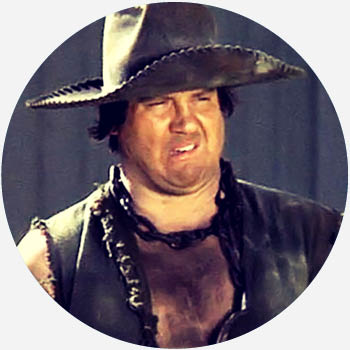

In [49]:
Image(newimg)

In [50]:
with open('./mongo.jpg', 'wb') as f:
    f.write(newimg)

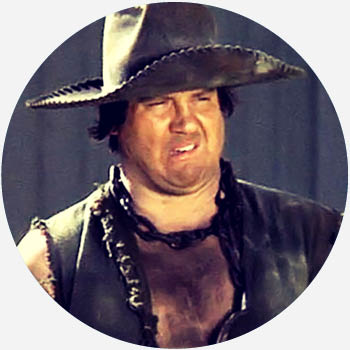

In [51]:
Image('./mongo.jpg')